<a href="https://colab.research.google.com/github/maleeham/Practical-Aspects-of-Data-Science/blob/master/CS6301CNNLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

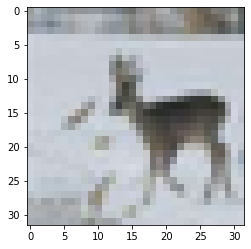

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[20])


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [15]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:

model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(x_test, y_test),
           shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 263s 5ms/step - loss: 1.7997 - acc: 0.3387 - val_loss: 1.5307 - val_acc: 0.4448
Epoch 2/100
50000/50000 [==============================] - 261s 5ms/step - loss: 1.4794 - acc: 0.4657 - val_loss: 1.3698 - val_acc: 0.5183
Epoch 3/100
50000/50000 [==============================] - 256s 5ms/step - loss: 1.3422 - acc: 0.5198 - val_loss: 1.2522 - val_acc: 0.5491
Epoch 4/100
50000/50000 [==============================] - 256s 5ms/step - loss: 1.2397 - acc: 0.5631 - val_loss: 1.1844 - val_acc: 0.5849
Epoch 5/100
50000/50000 [==============================] - 258s 5ms/step - loss: 1.1623 - acc: 0.5880 - val_loss: 1.1300 - val_acc: 0.6087
Epoch 6/100
50000/50000 [==============================] - 259s 5ms/step - loss: 1.0988 - acc: 0.6134 - val_loss: 1.0422 - val_acc: 0.6380
Epoch 7/100
50

In [0]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])